### Importing essential python libraries and the dataset

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

In [3]:
data= pd.read_csv("Myntra/Myntra kurtis.csv")
data.head()

,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)
3,Anubhutee,https://www.myntra.com/kurtis/anubhutee/anubhu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.3,1100,Ethnic Motifs Printed Kurti,521.0,1739.0,(70% OFF)
4,GERUA,https://www.myntra.com/kurtis/gerua/gerua-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,157,Ethnic Motifs Printed Kurti,449.0,1499.0,(70% OFF)


### Analyzing the data

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         364 non-null    object 
 1   Product URL        364 non-null    object 
 2   Product Ratings    364 non-null    float64
 3   Number of ratings  364 non-null    int64  
 4   Product Info       364 non-null    object 
 5   Selling Price      364 non-null    float64
 6   Price              364 non-null    float64
 7   Discount           364 non-null    object 
 8   Score              364 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 28.4+ KB


In [9]:
print(data.shape)
print(data.isnull().sum())

(599, 9)
Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


The dataset contains information about 599 products and has 9 fearures.  
There are 467 NULL values in Images and 198 in Product ratings column.  
Let's drop the Image column and other NULL values.

In [11]:
data=data.drop("Image",axis=1)

In [13]:
data=data.dropna()

In [15]:
data.shape

(364, 8)

Now we have 364 rows and 8 columns in the dataset. 
#### Let's look at the famous brands selling kurtis on Myntra. 

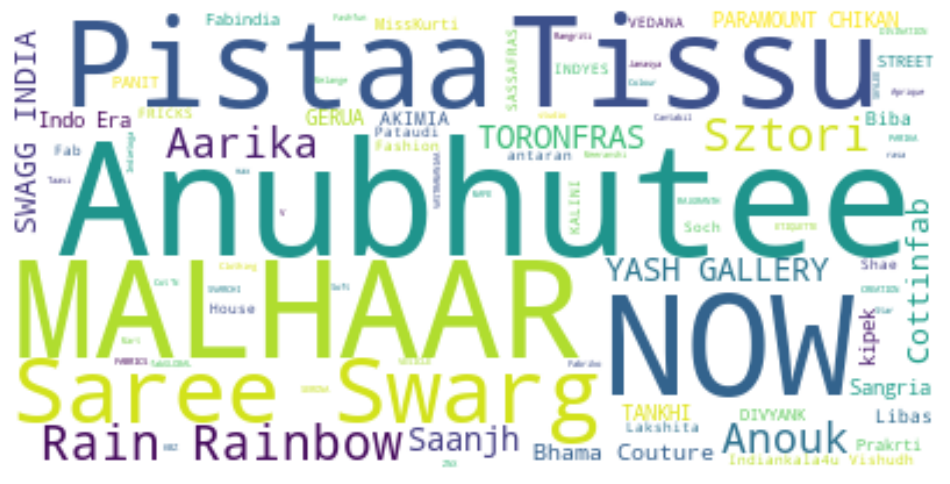

In [39]:
text= " ".join(i for i in data["Brand Name"])
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords= stopwords, background_color= "white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Brands like Anubhutee, Malhaar, Now, Tissu and Pistaa are popular for Kurtis on Myntra

#### Let's have a look at the ratings.

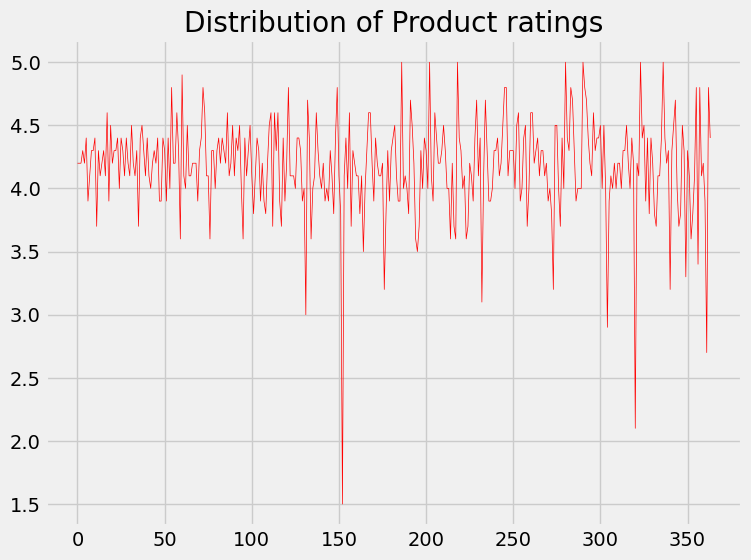

In [82]:
plt.figure(figsize=(8,6))
y1= np.array(data["Product Ratings"])

plt.plot(y1, color="r", linewidth=".5")
plt.title("Distribution of Product ratings")
plt.show()

Most of the Kurtis available on Myntra are rated between 3.5 to 4.5 between by the users.

In [41]:
ratings= data.sort_values(by=["Product Ratings"],ascending=False)
highest_ratings= ratings.head(10)
lowest_ratings= ratings.tail(10)

In [43]:
highest_ratings[["Product Info", "Product Ratings", "Brand Name"]]

,Product Info,Product Ratings,Brand Name
435,Mandarin Collar Kurti,5.0,INDYES
249,Floral Printed Kaftan Kurta,5.0,Sangria
448,Solid Pure Cotton Kurti,5.0,MALHAAR
308,Floral Printed Kurti,5.0,MALHAAR
538,Pure Cotton Kurti,5.0,MALHAAR
277,Women Solid Embellished Kurti,5.0,Fabindia
515,Chikankari Embroidered Kurti,5.0,PARAMOUNT CHIKAN
62,Ethnic Motifs Printed Kurti,4.9,Biba
80,Ethnic Motifs Embroidered Kurti,4.8,Sangria
450,Self Striped Straight Kurti,4.8,Saanjh


In [44]:
lowest_ratings[["Product Info", "Product Ratings", "Brand Name"]]

,Product Info,Product Ratings,Brand Name
561,Floral Embroidered Kurti,3.3,SWAGG INDIA
422,Floral Embroidered Kurti,3.2,Indo Era
235,Women Floral Printed Kurti,3.2,all about you
547,Georgette Kurti,3.2,VESICLE
335,Women Floral Printed Pure Cotton Kurti,3.1,AKIMIA
161,Women Printed Kurti,3.0,Saree Swarg
469,Paisley Printed Anarkali Kurti,2.9,MAFE
590,Printed Kurti,2.7,KALINI
511,Women Embroidered Kurti,2.1,PARIKA CREATION
197,Geometric Embroidered Kurti,1.5,TORONFRAS


Brands like Indyes, Malhaar and FabIndia have highest rated Kurtis. On the other hand Kalini, Parika Creation and Toronfras have lowest rated kurtis.

#### Let's have a look at the Selling price of items.

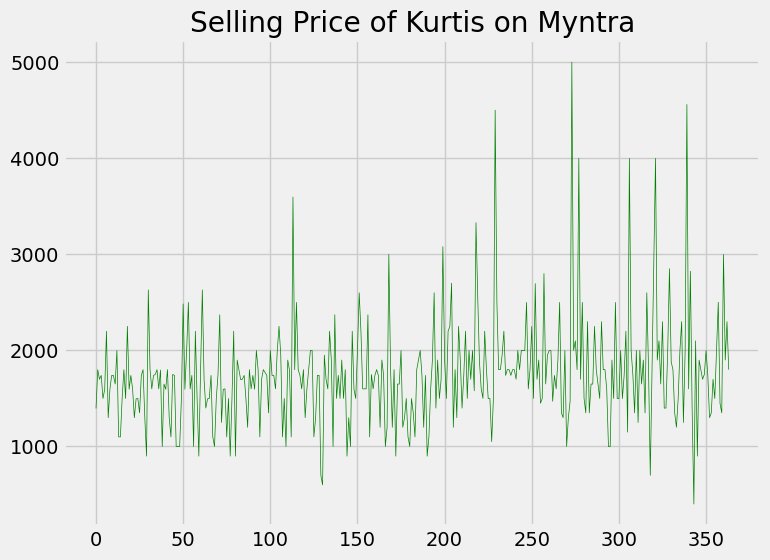

In [59]:
plt.figure(figsize=(8,6))
y1= np.array(data["Price"])

plt.plot(y1, color="g", linewidth=".5")
plt.title("Selling Price of Kurtis on Myntra")
plt.show()

From the above graph, we can say most of the kurtis range between 1000(INR) to 2500(INR) on Myntra.

### Let's set up a Recommendation System
To recommend the best products to users, let's find the weighted average of all the ratings and recommend the products based on that.  
You may also use other recommendation strategies such as content-based filtering. The Content based filtering is good to use when a user is looking at a product and you want to recommend something similar.  
  
To count the weighted score of all the ratings the formula is,  
<h3><center>Score= ((n/(n+m)*a) + (m/(m+n)*mr)</center></h3>
where, mr : mean rating of all the products<br>
        m : minimum number of ratings<br>   
        n : total number of ratings of the product<br>
        a : average rating of the product<br>

In [46]:
mr= data["Product Ratings"].mean()
m= data["Number of ratings"].quantile(0.9)
n= data["Number of ratings"]
a= data["Product Ratings"]

data["Score"]= (n/(n+m)*a) + (m/(m+n)*mr)

recommendations= data.sort_values("Score", ascending=False)
recommendations[["Brand Name", "Product Info", "Product URL", "Product Ratings", "Score", "Price", "Selling Price", "Discount"]].head(10)


,Brand Name,Product Info,Product URL,Product Ratings,Score,Price,Selling Price,Discount
48,Tissu,Women Floral Print A-Line Kurti,https://www.myntra.com/kurtis/tissu/tissu-wome...,4.4,4.338320,999.0,549.0,(45% OFF)
11,Anubhutee,Ethnic Motifs Printed Kurti,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.4,4.300868,1739.0,521.0,(70% OFF)
155,Anubhutee,Women Printed Kurti,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.4,4.296895,1739.0,486.0,(72% OFF)
66,YASH GALLERY,Printed A-Line Kurti,https://www.myntra.com/kurtis/yash-gallery/yas...,4.5,4.295568,1399.0,629.0,(55% OFF)
27,Anubhutee,Women Printed Straight Kurti,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.3,4.274815,1739.0,521.0,(70% OFF)
102,AKIMIA,Embroidered Pure Cotton Kurti,https://www.myntra.com/kurtis/akimia/akimia-se...,4.5,4.273667,1599.0,767.0,(52% OFF)
88,Tissu,Women Floral Printed Straight Kurti,https://www.myntra.com/kurtis/tissu/tissu-wome...,4.3,4.267992,899.0,548.0,(39% OFF)
3,Anubhutee,Ethnic Motifs Printed Kurti,https://www.myntra.com/kurtis/anubhutee/anubhu...,4.3,4.267992,1739.0,521.0,(70% OFF)
42,Rain & Rainbow,Women Printed Pure Cotton Pure Cotton A-Line K...,https://www.myntra.com/kurtis/rain--rainbow/ra...,4.4,4.264685,1595.0,797.0,(50% OFF)
18,GERUA,Ethnic Motifs Printed Kurti,https://www.myntra.com/kurtis/gerua/gerua-wome...,4.6,4.262359,1499.0,449.0,(70% OFF)


This system can provide significant benefits to both consumers and retailers in the fashion industry, such as improving the shopping experience, increasing customer satisfaction and loyalty, and boosting sales and revenue.